# ***深度学习入门：基于Python的理论和实践***

## ***第五章 误差反向传播法***

反向传播的作用是**高效**地计算损失函数的梯度,可以通过数学式或者计算图computational  graph理解

### **5.1 计算图**

计算图是一种**数据结构图**，由多个**结点**和**边**表示,有**正向**和**反向**

### **5.1.1 用计算图求解**

结点表示**计算方式**，边表示**数据传输**

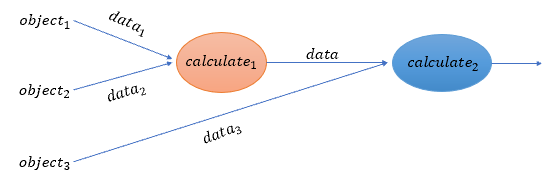

如图从左向右传播是正向传播(forward propogation),从右到左是反向传播**BP**

### **5.1.2 局部计算**

局部计算指的是各个结点的计算结果只有输入和计算方式决定，如上图$calculate_{1}$的计算只与其自身和$data_{1}$和$data_{2}$决定

这些结点就像是**零件**，最后组成了庞大的正向传播过程

### **5.1.3  为何用计算图解题**

计算图有两个优点:1.使用多个结点能**简化**冗杂的传播过程<br>
$\space$$\space$ $\space$ $\space$$\space$ $\space$ $\space$ $\space$ $\space$                           $\space$$\space$$\space$  $\space$$\space$ $\space$$\space$$\space$$\space$        2.可以将中间的计算结果全部保存<br>
$\space$$\space$ $\space$ $\space$$\space$ $\space$ $\space$ $\space$ $\space$                           $\space$$\space$$\space$  $\space$$\space$ $\space$$\space$$\space$$\space$        3.高效计算偏导数(对比于数值微分)<br>

偏导数$\frac {\partial L}{\partial x}$结果表示x的变化引起L变化的程度

### **5.2 链式法则**

链式法则(chain rule)指的是计算图在反向传播时传递偏导数的过程，像一条“链子”一样

### **5.2.1 计算图的反向传播**

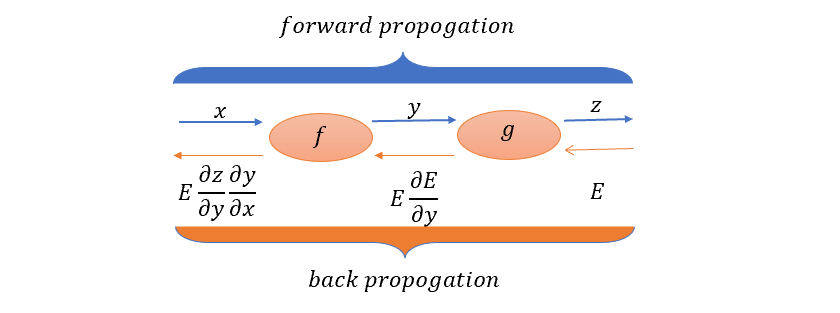

如图结点g向f反向传递了$ E\frac {\partial z}{\partial y}$，结点f反向传递了$E\frac{\partial z}{\partial y}\frac {\partial y}{\partial x}$

例如假设$z=y^{2}$g反向传递$E2y$

### **5.2.2 什么是链式法则**

在多元复合函数中，求因变量对某个自变量的偏导数需要联系所有的中间变量，因此为链式法则(chain rule)

例如$f(x,y)=z;g(z,k)=E$则$\frac{\partial E}{\partial x}=\frac{\partial E}{\partial z}\frac{\partial z}{\partial x}$,其中的z作为中间变量联系了E对x的偏导 

### **5.2.3 链式法则和计算图**

在计算图中的反向传播时基于链式法则的，以$z=t^{2};t=x+y$为例，在计算图中表示$\frac{\partial z}{\partial x}$

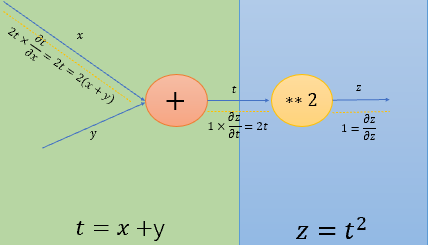

图中有两个中间结点“+”和“**2”，传递了两次导数

### **5.3 反向传播**

对应着计算图的反方向，**基于链式法则**

### **5.3.1 加法结点的反向传播**

加法结点的意思是计算图中所有的**结点均为"+"**,即作用是仅将所有的输入相加再传出

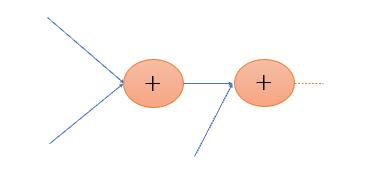

因此反向传播时传的参数均为$\frac{\partial }{\partial }=1$，即原封不动地一次次传出输入数据

### **5.3.2 乘法结点的反向传播**

乘法结点的反向传播是计算图中所有的**结点均为"*"**,即让所有的输入相乘再传出，传出结果是"翻转的"

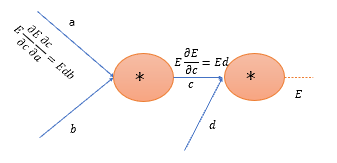

"翻转"结果为Edb

### **5.3.3 苹果的例子**

原书中苹果的例子就是均为乘法结点的计算图$\rightarrow$

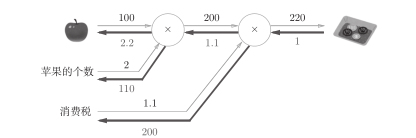

要计算总价格对苹果单价的偏导，利用乘法结点的"翻转"结论$\rightarrow$ $\frac{\partial E}{\partial x}=1.1*2=2.2$

书上的"橘子"的练习：

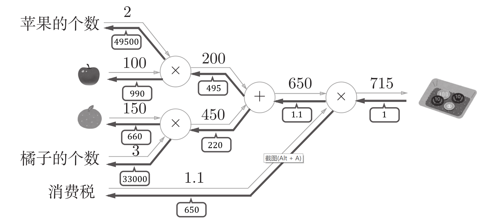

### **5.4 简单层的实现**

用python实现计算图中的乘法层(Mullayer)和加法层(Addlayer)

定义一个乘法层的类(multipullayer)$\Rightarrow$

In [ ]:
class mullayer:
    def __init__(self):#初始化实例变量，用于保存正向传播的输入值
        self.x=None
        self.y=None
    def forward(self,x,y):#接受x,y两个参数，相乘后输出,正向传播过程
        self.x=x
        self.y=y
        out=x*y
        return out 
    def backward(self,dout):#dout是上一层的输入
        dx=dout*self.y#翻转过程
        dy=dout*self.x
        return dx,dy#这是一个结点在反向传播中输出的局部偏导

将乘法层的类应用于"苹果"的例子中$\Rightarrow$

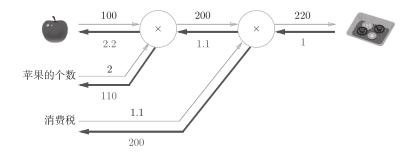

In [1]:
"""
Created on Thu Apr 28 17:38:56 2022

@author: wangchen
"""
class mullayer:
    def __init__(self):#初始化实例变量，用于保存正向传播的输入值
        self.x=None
        self.y=None
    def forward(self,x,y):#接受x,y两个参数，相乘后输出,正向传播过程
        self.x=x
        self.y=y
        out=x*y
        return out 
    def backward(self,dout):#dout是上一层的输入
        dx=dout*self.y#翻转过程
        dy=dout*self.x
        return dx,dy#这是一个结点在反向传播中输出的局部偏导
#根据例子初始化参数->
apple=100#价格
apple_num=2#数量
tax=1.1#税率
#苹果例子中有两个结点，因此定义两个层
mul_apple_layer=mullayer()
mul_tax_layer=mullayer()
#接下来是前向传播的过程，若先反向传播，则backward()缺少参数
apple_price=mul_apple_layer.forward(apple, apple_num)#税前
price=mul_tax_layer.forward(apple_price, tax)#税后
#接着进行反向传播
dprice=1#price是最终参数因此为1
dapple_price,dtax=mul_tax_layer.backward(dprice)#先经过"收税"结点
dapple,dapple_num=mul_apple_layer.backward(dapple_price)#最后经过"税前”结点
#--------------------------------------------------------------------------
print(dapple,dapple_num,dtax)

2.2 110.00000000000001 200


### **5.4.2 加法层的实现**

同理定义一个加法层的类$\Rightarrow$

In [ ]:
"""
Created on Thu Apr 28 22:00:49 2022

@author: wangchen
"""
class addlayers:
    def __init__(self):#加法层无需特定初始化
        pass
    def forward(self,x,y):#前向传播
        out=x+y
        return out
    def backward(self,dout):#反向传播
        dx=dout*1
        dy=dout*1#加法层反向传播的"不变性"
        return dx,dy

有了加法层和乘法层的类，可以混合使用解决"两个苹果和三个橘子的问题"$\rightarrow$

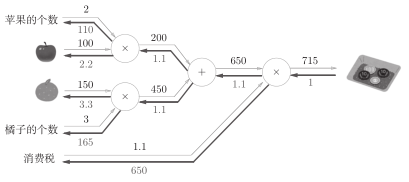

In [1]:
"""
Created on Fri Apr 29 09:43:34 2022

@author: wangchen
"""
class mullayer:#乘法层
    def __init__(self):#初始化实例变量，用于保存正向传播的输入值
        self.x=None
        self.y=None
    def forward(self,x,y):#接受x,y两个参数，相乘后输出,正向传播过程
        self.x=x
        self.y=y
        out=x*y
        return out 
    def backward(self,dout):#dout是上一层的输入
        dx=dout*self.y#翻转过程
        dy=dout*self.x
        return dx,dy#这是一个结点在反向传播中输出的局部偏导
class addlayers:#加法层
    def __init__(self):
        pass
    def forward(self,x,y):
        out=x+y
        return out
    def backward(self,dout):
        dx=dout*1
        dy=dout*1
        return dx,dy
#初始化参数
apple=100#苹果单价
apple_num=2#苹果数量
orange=150#橘子单价
orange_num=3#橘子数量
tax=1.1#税率
#根据4个结点的不同作用初始化层
mul_apple_layer=mullayer()
mul_orange_layer=mullayer()
add_apple_orange_layer=addlayers()
mul_tax_layer=mullayer()
#前向传播
apple_price=mul_apple_layer.forward(apple, apple_num)
orange_price=mul_orange_layer.forward(orange, orange_num)
all_price=add_apple_orange_layer.forward(apple_price, orange_price)
price=mul_tax_layer.forward(all_price, tax)
#反向传播
dprice=1
dall_price,dtax=mul_tax_layer.backward(dprice)
dapple_price,dorange_price=add_apple_orange_layer.backward(dall_price)
dorange,dorange_num=mul_orange_layer.backward(dorange_price)
dapple,dapple_num=mul_apple_layer.backward(dorange_price)
#输出结果
print(price)
print(dapple_num,dapple,dorange,dorange_num,dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


### **5.5激活函数层的实现**

类似于乘法层和加法层，激活函数层的结点的计算是由其计算方式决定的，例如$Relu$和$Sigmoid$

激活函数$ReLU$（Rectified Linear Unit）$\rightarrow$

$$y=\begin{cases}x,& \text{x>0}\\ 0,& \text {x<=0}\\ \end{cases} \Rightarrow \frac{\partial y}{\partial x}=\begin{cases}1,& \text{x>0}\\0,&\text{x<=0}\\ \end{cases}$$

在计算图的作用：在正向传播中若输入大于0，则在反向传播中原封不动的传给下游，否则停止传播

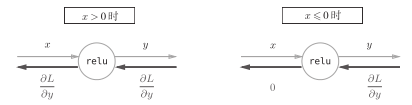

$ReLU$层的代码实现$\rightarrow$

In [2]:
"""
Created on Fri Apr 29 16:31:40 2022

@author: wangchen
"""
class relu:
    def __init__(self):
        self.mask=None
    def forward(self,x):
        self.mask=(x<=0)#mask是布尔型列表
        out=x.copy()
        out[self.mask]=0
        return out#使得x中所有小于0的元素为0
    def backward(self,dout):#反向传播中会使用正向传播时保存的mask
        dout[self.mask]=0#大于0的元素在反向传播中原封不动传回
        dx=dout
        return dx

### **5.5.2 Sigmoid层**

$Sigmoid$表达式为$$y=\frac{1}{1+exp(-x)}$$

观察到$Sigmoid$表达式由"+","\","exp","*-1",因此可以拆成多个结点$\rightarrow$

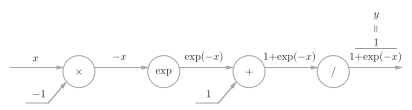

以一个"Sigmoid"结点来表达反向传播$\rightarrow$

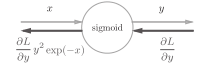

推导过程$\Rightarrow$

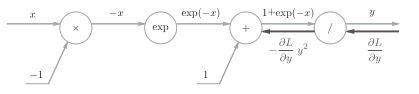

$$\frac{\partial L}{\partial y}\frac{\partial y}{\partial x}=-\frac{\partial L}{\partial y}y^{2}$$

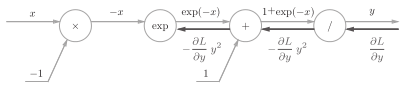

$$-\frac{\partial L}{\partial y}y^{2}\frac{\partial y}{\partial y}=-\frac{\partial L}{\partial y}y^{2}$$

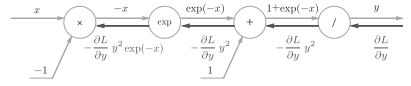

$$-\frac{\partial L}{\partial y}y^{2}\frac{\partial exp(-x)}{\partial (-x)}=-\frac{\partial L}{\partial y}y^{2}exp(-x)$$

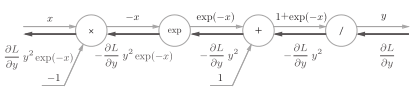

$$-\frac{\partial L}{\partial y}y^{2}exp(-x)\frac{\partial (-x)}{\partial x}=\frac{\partial L}{\partial y}y^{2}exp(-x)$$

进一步将结果归一化$\rightarrow$

$$\frac{\partial L}{\partial y}y^{2}exp(-x)=\frac{\partial L}{\partial y}\frac{1}{1+exp(-x)}\frac{exp(-x)}{1+exp(-x)}=\frac{\partial L}{\partial y}y(1-y)$$

最后得出的$Sigmoid$结点$\Rightarrow$

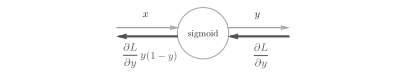

以下是$Sigmoid$激活函数层的代码实现$\Rightarrow$

In [3]:
"""
Created on Fri Apr 29 16:31:40 2022

@author: wangchen
"""
import numpy as np
class sigmoid:
    def __init__(self):
        self.out=None
    def forward(self,x):
        out=1/(1+np.exp(-x))
        self.out=out
        return out
    def backward(self,dout):#反向传播时使用正向传播中保存的out值
        dx=dout*(1.0-self.out)*self.out
        return dx

### **5.6 Affine/softmax层的实现**

### **5.6.1 Affine层的实现**

$Affine$层是进行仿射变化的层，对应着神经网络中矩阵的点积和偏置的相加

$Affine$层在计算图中的表示$\rightarrow$

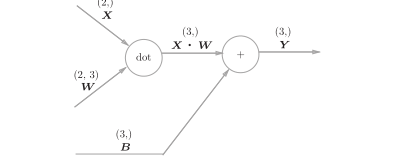

与之前不同的是，参与计算处理的是多维数组

接着是$Affine$层的反向传播$\Rightarrow$

$$\frac{\partial l}{\partial  X}=\frac{\partial l}{\partial Y}·W^T;\frac{\partial l}{\partial W}=X^T·\frac{\partial l}{\partial Y}$$

关于转置的问题$\rightarrow$

$$W=\begin{pmatrix}w_{11}&w_{12}&w_{13}\\w_{21}&w_{22}&w_{23}\\ \end{pmatrix} \rightarrow W^{T}=\begin{pmatrix}w_{11}&w_{21}\\w_{12}&w_{22}\\w_{13}&w_{23}\\ \end{pmatrix}$$

反向传播过程$\rightarrow$

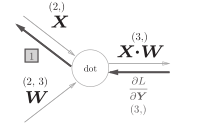

$dot$结点的反向传播可以由矩阵对应维度的元素个数一致的乘积运算而推导出来

### **5.6.2 批版本的Affine层**

批版本的$Affine$层指的是能够处理$N$个数据的层，得益于其矩阵对应维度的大小

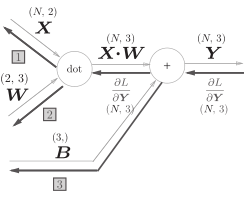

以图中的"1","2","3"的大小表示批版本的$Affine$层能处理多个数据的原因

$$\langle 1 \rangle \space (N,2)=(N,3)(3,2)$$ $$\langle 2 \rangle \space (2,3)=(2,N)(N,3)$$$$\langle 3 \rangle \space(3)=(N,3)$$

观察到第3个式子是对偏置偏导的大小，因此还要对结果进行一次$axis=0$方向上的求导

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  1 14:26:55 2022

@author: wangchen
"""
import numpy as np
class Affine:
    def __init__(self,w,b):
        self.w=0
        self.b=0
        self.x=None
        self.dw=None
        self.db=None
    def forward(self,x):
        self.x=x#实例化self
        out=np.dot(x,self.w)+self.b#正向传播
        return out
    def backward(self,dout):
        dx=np.dot(dout,self.w.T)
        self.dw=np.dot(self.x.T,dout)
        self.db=np.sum(dout,axis=0)#为了符合矩阵大小，对在第零维的方向求和
        return dx

### **5.6.3 Softmax-with-loss层**

这里的$Softmax$是学习阶段中神经网络$Affine$下一层的概率分布函数，这里的$loss$指的是交叉熵损失函数$(cross-entropy-error)$

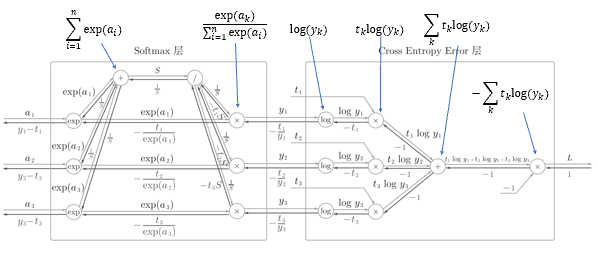

具体过程$\rightarrow$$Softmax$将输入正规化，把结果传递给$cross entorpy erro$层，再对比监督标签得出损失

简化"结点"$\Rightarrow$

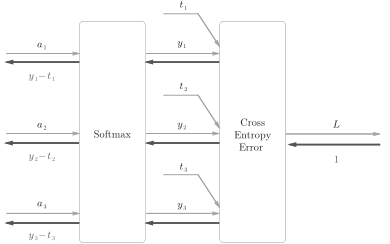

$Softmax-with-loss$层反向传播的结果是$Softmax$的输出数据$y_{i}$与监督数据$t_{i}$的差值

${\rm {代码的实现}}$$\rightarrow$

In [2]:
import numpy as np
def softmax(a): # a是整个输出数据构成的数组
    a_exp=np.exp(a)# 所有元素指数化
    a2_sum=np.sum(a_exp)#指数化后求和
    return a_exp/a2_sum
def cross_entropy_error(y,t):
    delta_protect=1e-8#避免因为预测输出为0的情况下导致交叉熵无限大
    return -np.sum(t*np.log(y+delta_protect))
class softmaxwithloss:
    def __init__(self):
        self.loss=None#损失
        self.y=None#softmax的输出
        self.t=None#监督数据
    def forward(self,x,t):
        self.t=t#实例化t
        self.y=softmax(x)#概率分布
        self.loss=cross_entropy_error(self.y,self.t)#交叉熵
    def backward(self,dout=1):
        batch_size=self.t.shape[0]
        dx=(self.y-self.t)/batch_size#求的是单个数据的误差
        return dx

### **5.7 误差反向传播法的实现**

我们有了以上加法层、乘法层、$Affine$层、$Softmax-with-loss$层，可以搭建神经网络

### **5.7.1 神经网络学习的全貌图**

神经网络学习的定义:**调整权重和偏置**以便拟合训练数据的过程

步骤$\Rightarrow$**1.**从训练数据中选择一部分数据(mini-batch)$\rightarrow$**2.**计算损失函数关于各个权重参数的梯度$\rightarrow$**3.**沿梯度微笑更新参数$\rightarrow$**4.**重复(提高精度)

加法层、乘法层、$Affine$层、$Softmax-with-loss$层用于上面**第二个步骤**之中

### **5.7.2对应误差反向传播法的神经网络的实现**

In [ ]:
import numpy as np
import layers
from gradient import numerical_gradient
from collections import OrderedDict
class twolayersnet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
#生成TwoLayersNet时生成实例的方法（输入层个数，隐藏层个数，输出层个数，权重初始化）
        self.params={}
        self.params['W1']=weight_init_std * np.random.randn(input_size,hidden_size)#初始化权重,权重的大小与各自的输入输出大小有关
        self.params['b1']=np.zeros(hidden_size)#b1、b2的权重都初始为0
        self.params['W2']=weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
        #生成层
        self.layers=OrderedDict()#将层保存在一个有序的字典中
        self.layers['Affine1']=layers.Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1']=layers.Relu()
        self.layers['Affine2']=layers.Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = layers.SoftmaxWithLoss()
#对应着Affine->Relu->Affine->softmax
   def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
#前向传播
   def loss(self,x,t):
        y=self.predict(x)
        return self.lastLayer.forward(y, t)
#对应Softmaxwithloss层
   def accuracy(self,x,t):
       y=self.predict(x)
       y=np.argmax(y,axis=1)
       if t.nidm !=1 : t=np.argmax(t,axis=1)
       accuracy=np.sum(y==t)/float(x.shape[0])
       return accuracy
#计算精度
   def numerical_gradient(self,x,t):#计算数值梯度
       loss_w=lambda W:self.lossfunction(x,t)
       grads={}#这里的grad用于存储框架中权重和偏置的梯度
       grads['W1']=numerical_gradient(loss_w, self.params['W1'])
       grads['b1']=numerical_gradient(loss_w, self.params['b1'])
       grads['W2']=numerical_gradient(loss_w, self.params['W2'])
       grads['b2']=numerical_gradient(loss_w, self.params['b2'])
       return grads
#数值微分，返回偏导数的字典
   def gradient(self,x,t):
       self.loss(x,t)
       dout=1
       dout=self.lastLayer.backward(dout)
       layers=list(self.layers.values())
       layers.reverse()
       for layer in layers:
           dout=layer.backward(dout)
#反向传播，返回Affine层和Relu层的dw db
       grads={}
       grads['W1']=self.layers['Affine1'].dw
       grads['b1']=self.layers['Affine1'].db
       grads['W2']=self.layers['Affine2'].dw
       grads['b2']=self.layers['Affine2'].db
       return grads
       

### **5.7.3 误差反向传播法的确认**

梯度确认指的是**验证**数值微分求出的梯度结果和误差反向传播法求出的结果**是否一致**

In [ ]:
"""
Created on Sun May  1 19:38:51 2022

@author: wangchen
"""
import numpy as np
from mnist import load_mnist
from two_layer_net import TwoLayerNet
#读入数据
(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,one_hot_label=True)
#导入层并初始化大小
network=TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#切片
x_batch=x_train[:3]
t_batch=t_train[:3]
#分别用两种方法求偏导
grad_numerial=network.numerical_gradient(x_batch, t_batch)
grad_backpropogation=network.gradient(x_batch, t_batch)
#求各个权重的绝对误差的平均值
for key in grad_numerial.keys():#以grad_numerial中的键为例
    diff=np.average(np.abs(grad_backpropogation[key])-grad_numerial[key])
    print(key+':'+str(diff))

由于two_layer_net和mnist不在Jupyter的路径下，所以运行的结果是$\Rightarrow$

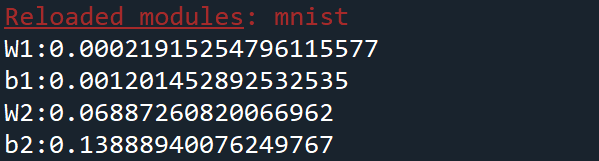

由此可见**差距非常小**，可以认为反向传播的**结果**是正确的

### **5.7.4 使用误差反向传播法的学习**

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  1 19:57:15 2022

@author: wangchen
"""
import numpy as np
from mnist import load_mnist
from two_layer_net import TwoLayerNet
#读入mnist数据
(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,one_hot_label=True)
#导入层
network=TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#--------------------------------------------------------------------------------------
iters_num=10000#训练次数
train_size=x_train.shape[0]#训练数据的大小
batch_size=100#每次训练所抽取的样本数量
learning_rate=0.1#学习率
train_loss_list=[]#训练集损失列表
train_acc_list=[]#训练集准确率列表
test_acc_list=[]#测试集准确率列表
#初始化超参数--------------------------------------------------------------------------
iter_per_epoch=max(train_size/batch_size,1)#定义一个epoch长度
for i in range(iters_num):
    batch_mask=np.random.choice(train_size,batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    grad=network.gradient(x_batch, t_batch)#训练部分，返回梯度字典
    for key in ('W1','b1','W2','b2'):#学习部分，梯度下降
        network.params[key]-=learning_rate*grad[key]#更新权重和梯度参数
    loss=network.loss(x_batch,t_batch)#求损失
    train_loss_list.append(loss)#添加至损失列表中
    if i%iter_per_epoch==0:#每一个epoch就记录一次精度
        train_acc=network.accuracy(x_train, t_train)#训练精度
        test_acc=network.accuracy(x_test, t_test)#测试精度
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc,test_acc)

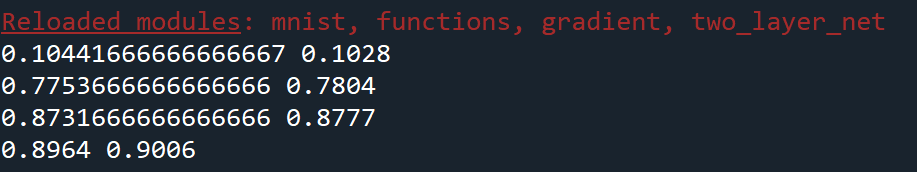

能从中看出训练精度和测试精度是相近的，有较强的**泛化能力**

### **5.8 小结**

• 通过使用计算图，可以直观地把握计算过程,结点代表运算方式，连线代表数据传输。<br>
• 计算图的节点是由局部计算构成的。局部计算构成全局计算。<br>
• 计算图的正向传播进行一般的计算。通过计算图的反向传播，可以计算各个节点的导数,不同层传递导数的方式不同。<br>
• 通过将神经网络的组成元素实现为层，可以高效地计算梯度（反向传播法），可以用数值微分验证其准确性。<br>
• 通过比较数值微分和误差反向传播法的结果，可以确认误差反向传播法的实现是否正确（梯度确认）。<br>